# Simplifiying the Identification of Code Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages

## Data Preprocessing

In [2]:
def load_data_from_csv(CSV_PATH):
    return pd.read_csv(CSV_PATH,delimiter = ';',
                       names = ["module_sub_routine","id","hardware_Counter","time","event"])

In [3]:
def drop_columns(dataFrame,list_col):
    return dataFrame.drop(list_col,axis=1)

In [4]:
# Modifying the data

arr = ['module_sub_routine','id','time']
scalerPath = '../../data/WACCM_imp_sol_scaler.slope.labelled.csv'
scalarDF = load_data_from_csv(scalerPath)
scalarDF = drop_columns(scalarDF,arr)
    
vectorPath = '../../data/WACCM_imp_sol_vector.slope.labelled.csv'
vectorDF = load_data_from_csv(vectorPath)
vectorDF = drop_columns(vectorDF,arr)
    
psradPath = '../../data/mg2/PSrad.exe.codeblocks.fused.any.any.any.slope.labelled .csv'
psradDF = load_data_from_csv(psradPath)
psradDF = drop_columns(psradDF,arr)
    
wetdepaPath = '../../data/wetdepa_driver_v0.labelled.csv'
wetdepaDF = load_data_from_csv(wetdepaPath)
wetdepaDF = drop_columns(wetdepaDF,arr)
    
clubbPath = '../../data/clubb.labelled.csv'
clubbDF = load_data_from_csv(clubbPath)
clubbDF = drop_columns(clubbDF,arr)

In [5]:
clubbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82800 entries, 0 to 82799
Data columns (total 2 columns):
hardware_Counter    82800 non-null object
event               82800 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
def get_CounterNames(dataFrame):
    counter_name = dataFrame['hardware_Counter']
    return counter_name.unique()

def remove_ABS_Counter(counterNames):
    counterName = []
    for str in counterNames:
        if "_per_ins" in str:
            counterName.append(str)
        elif "LABEL" == str:
            counterName.append(str)
    return counterName

In [7]:
counter_name = get_CounterNames(vectorDF)
counterNameList = remove_ABS_Counter(counter_name) 
counterNameList.remove("PAPI_VEC_DP_per_ins")
len(counterNameList)


43

Above two list has different number of items. Out of all the lists VectorDF has less number of hardware counters. So considering only vectorDF.

In [8]:
def rearrange(dataFrame,counterNameList):
    df_per_ins = pd.DataFrame(columns = counterNameList)
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins[tempStr] = temp_df['event'].values
    df_per_ins = df_per_ins[~df_per_ins.isin([np.nan,np.inf,-np.inf]).any(1)]
    return df_per_ins

In [9]:
scalarDF = rearrange(scalarDF,counterNameList)
vectorDF = rearrange(vectorDF,counterNameList)
psradDF = rearrange(psradDF,counterNameList)
wetdepaDF = rearrange(wetdepaDF,counterNameList)
clubbDF = rearrange(clubbDF,counterNameList)    

In [10]:
def append_DataFrames(dataFrameA,dataFrameB):
    return dataFrameA.append(dataFrameB)

In [11]:
resultDF = append_DataFrames(scalarDF,vectorDF)
resultDF = append_DataFrames(resultDF, psradDF)
resultDF = append_DataFrames(resultDF,wetdepaDF)

In [12]:
resultDF

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
1,0.044295,0.058603,0.000749,0.017464,0.043467,0.026829,0.014308,0.000000,0.039988,0.000000,...,0.010735,0.082503,0.0,0.251564,0.000000,0.002026,0.000421,1.439640,0.267150,-1.0
2,0.033854,0.044791,0.000572,0.013353,0.033225,0.020500,0.010936,0.000000,0.030483,0.000000,...,0.008149,0.400129,0.0,0.192323,0.262785,0.001548,0.000322,1.100610,0.203565,-1.0
3,0.033807,0.044730,0.000571,0.013344,0.033185,0.020462,0.010923,0.000000,0.030292,0.000000,...,0.008048,0.400268,0.0,0.192153,0.513357,0.001546,0.000321,1.099620,0.202199,-1.0
4,0.033741,0.044645,0.000569,0.013332,0.033129,0.020408,0.010904,0.000000,0.030016,0.000000,...,0.007914,0.400445,0.0,0.191920,0.514072,0.001541,0.000320,1.098210,0.200261,-1.0
5,0.033658,0.044538,0.000567,0.013316,0.033061,0.020341,0.010880,0.000000,0.029668,0.000000,...,0.007755,0.400645,0.0,0.191635,0.514923,0.001535,0.000319,1.096450,0.197821,-1.0
6,0.033561,0.044414,0.000564,0.013298,0.032981,0.020263,0.010852,0.000000,0.029268,0.000000,...,0.007576,0.400855,0.0,0.191306,0.515866,0.001526,0.000317,1.094380,0.194979,-1.0
7,0.033453,0.044274,0.000561,0.013276,0.032893,0.020176,0.010821,0.000000,0.028822,0.000000,...,0.007382,0.401062,0.0,0.190940,0.516872,0.001515,0.000316,1.092020,0.191828,-1.0
8,0.033335,0.044122,0.000557,0.013252,0.032797,0.020082,0.010786,0.000000,0.028343,0.000000,...,0.007178,0.401257,0.0,0.190544,0.517907,0.001503,0.000314,1.089420,0.188439,-1.0
9,0.033211,0.043960,0.000553,0.013226,0.032695,0.019984,0.010749,0.000000,0.027845,0.000000,...,0.006967,0.401436,0.0,0.190125,0.518956,0.001489,0.000311,1.086640,0.184893,-1.0
10,0.033083,0.043795,0.000548,0.013199,0.032590,0.019883,0.010711,0.000000,0.027339,0.000000,...,0.006755,0.401614,0.0,0.189702,0.520022,0.001474,0.000309,1.083780,0.181259,-1.0


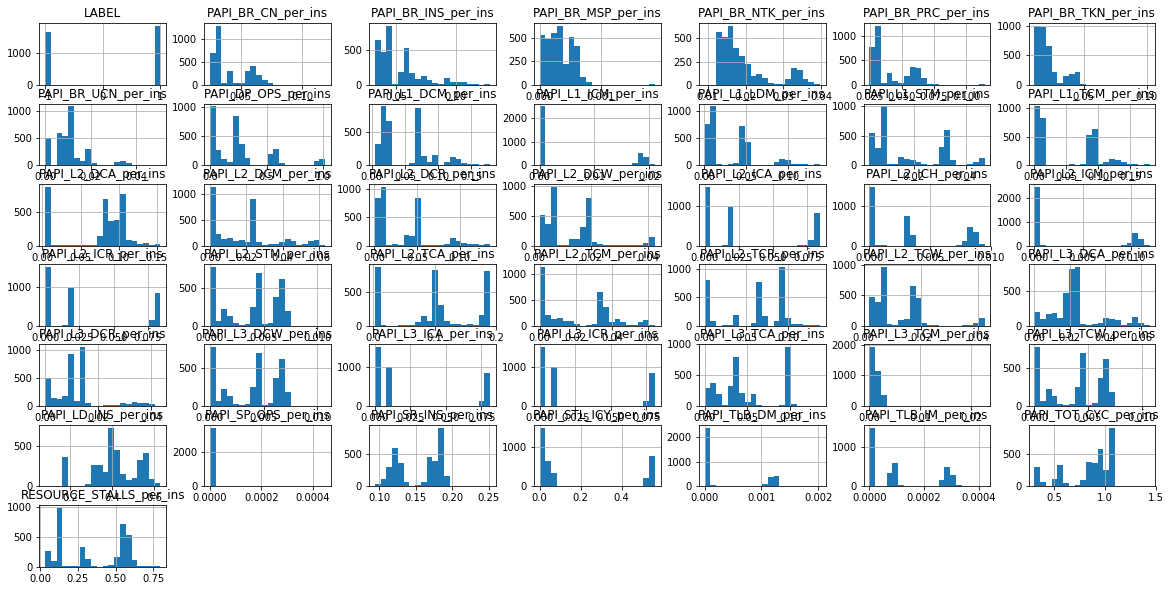

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

resultDF.hist(bins = 20,figsize=(20,10))
plt.show()

## Create Test Set

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(resultDF,test_size = 0.2, random_state=42)
print(len(train_set),"Train +",len(test_set),"test")

(2795, 'Train +', 699, 'test')


In [15]:
test_set.head()

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
949,0.028966,0.036510,0.000335,0.016255,0.028692,0.012710,0.007542,0.247923,0.070003,0.018424,...,0.006376,0.549109,0.0,0.170446,0.052079,0.000026,0.000076,0.930827,0.546198,1.0
369,0.061183,0.061195,0.000000,0.035588,0.059904,0.025597,0.000000,0.567718,0.014878,0.000000,...,0.000000,0.382106,0.0,0.131916,0.000000,0.000000,0.000000,0.569980,0.310028,1.0
654,0.057224,0.067766,0.000157,0.020206,0.057177,0.037021,0.010545,0.240337,0.130431,0.000162,...,0.001560,0.446779,0.0,0.107410,0.002884,0.000040,0.000003,0.836692,0.563632,-1.0
884,0.028393,0.035773,0.000313,0.016018,0.027957,0.012375,0.007378,0.244307,0.069302,0.018313,...,0.006289,0.516829,0.0,0.171630,0.052827,0.000034,0.000078,0.916432,0.539805,1.0
773,0.053858,0.101274,0.000308,0.014396,0.050709,0.039437,0.047438,0.401446,0.068913,0.000163,...,0.006475,0.315747,0.0,0.121373,0.004819,0.000786,0.000004,0.914490,0.587025,-1.0


In [16]:
corr_matrix = resultDF.corr()

In [17]:
corr_matrix["LABEL"].sort_values(ascending = False)

LABEL                      1.000000
PAPI_L1_ICM_per_ins        0.601138
PAPI_L2_ICM_per_ins        0.599744
PAPI_L2_ICH_per_ins        0.376299
PAPI_BR_NTK_per_ins        0.359937
RESOURCE_STALLS_per_ins    0.247597
PAPI_DP_OPS_per_ins        0.225038
PAPI_L1_STM_per_ins        0.154447
PAPI_LD_INS_per_ins        0.133888
PAPI_L2_TCM_per_ins        0.126695
PAPI_L1_TCM_per_ins        0.118934
PAPI_L3_TCM_per_ins        0.008795
PAPI_L2_DCM_per_ins       -0.025559
PAPI_L3_DCW_per_ins       -0.090546
PAPI_L2_STM_per_ins       -0.090546
PAPI_L3_TCW_per_ins       -0.090546
PAPI_SP_OPS_per_ins       -0.107840
PAPI_L2_DCW_per_ins       -0.119651
PAPI_L2_DCR_per_ins       -0.128108
PAPI_L2_TCW_per_ins       -0.143697
PAPI_L1_LDM_per_ins       -0.148066
PAPI_L1_DCM_per_ins       -0.151942
PAPI_SR_INS_per_ins       -0.166720
PAPI_BR_PRC_per_ins       -0.182877
PAPI_BR_CN_per_ins        -0.192655
PAPI_BR_INS_per_ins       -0.344690
PAPI_L3_DCR_per_ins       -0.349311
PAPI_BR_UCN_per_ins       -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16619c90>,
      dtype=object)

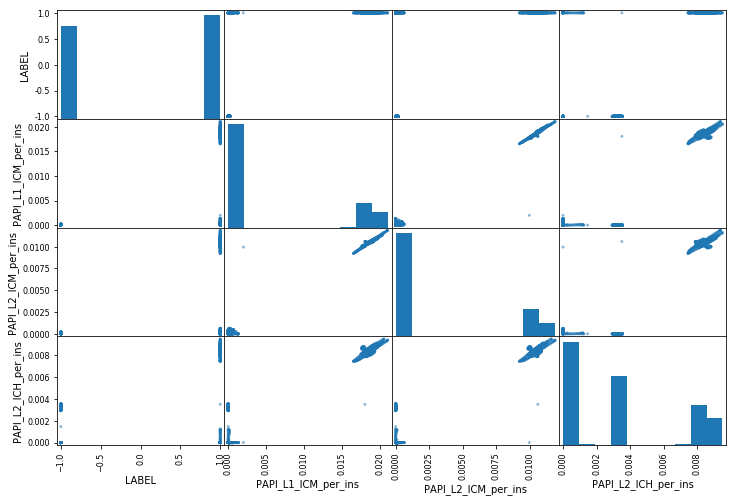

In [18]:
attributes = ["LABEL","PAPI_L1_ICM_per_ins","PAPI_L2_ICM_per_ins","PAPI_L2_ICH_per_ins"]

from pandas.plotting import scatter_matrix

scatter_matrix(resultDF[attributes], figsize=(12,8)) ## scatter matrix plots every numerical attributes against each other numerical attribute

## Prepare Data for ML

In [19]:
train_Features = train_set.drop("LABEL",axis=1)
train_Labels = train_set["LABEL"].copy()

## Feature Scaling

In [20]:
# Making all the features in same scale. Creating a pipeline to handle this. But most of our data is in same scale I am not using it. 
# it is for future purpose only

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [21]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        
    ])

In [22]:
train_Features_prepared = full_pipeline.fit_transform(train_Features)

In [23]:
train_Features_prepared

array([[ 0.07160813,  0.17309788,  1.33792377, ...,  1.30725492,
         0.6439946 , -1.03177653],
       [-0.94899319, -0.95251914,  0.01109085, ..., -0.20170866,
         0.42034414,  0.96957841],
       [-0.766926  , -0.78381807,  0.03585042, ..., -0.32170868,
         0.51193918,  1.00957799],
       ...,
       [-0.73050994, -0.73784693, -0.14678999, ..., -0.08290306,
         0.77339607,  1.3166197 ],
       [-0.5862501 , -0.46063167,  0.73692605, ...,  1.57160659,
         0.93684836, -1.00485482],
       [ 1.04335719,  0.2530806 , -1.36693966, ..., -0.88923103,
        -1.17855057, -0.3190795 ]])

In [24]:
train_Features

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCM_per_ins,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins
998,0.043148,0.056413,0.000648,0.019456,0.040752,0.023693,0.013265,0.000000,0.023509,0.000000,...,1.992210e-04,0.003659,0.405529,0.000000e+00,0.182999,0.476152,0.000932,2.618650e-04,0.992130,0.132484
570,0.027596,0.035011,0.000330,0.015672,0.027016,0.011924,0.007416,0.258119,0.073360,0.018154,...,1.927790e-03,0.006373,0.545066,0.000000e+00,0.167914,0.056225,0.000038,8.196640e-05,0.938534,0.555775
627,0.030371,0.038218,0.000336,0.017084,0.028861,0.013287,0.007845,0.251121,0.068771,0.019009,...,2.029640e-03,0.006564,0.558915,0.000000e+00,0.176061,0.054176,0.000040,6.766000e-05,0.960484,0.564235
696,0.064180,0.073392,0.000152,0.022539,0.065583,0.041660,0.009201,0.205499,0.157499,0.000164,...,1.442180e-03,0.001957,0.457704,0.000000e+00,0.129667,0.003066,0.000053,3.216710e-06,0.903191,0.625287
31,0.030207,0.037966,0.000261,0.017071,0.029371,0.013137,0.007764,0.256911,0.071053,0.018908,...,1.945500e-03,0.006400,0.557228,0.000000e+00,0.174805,0.054134,0.000028,8.964030e-05,0.937466,0.549731
548,0.032632,0.043251,0.000647,0.013682,0.032046,0.018949,0.010619,0.000000,0.022401,0.000000,...,0.000000e+00,0.004598,0.412280,0.000000e+00,0.188785,0.545086,0.001269,2.967030e-04,1.072360,0.137692
420,0.060230,0.060215,0.000000,0.035260,0.056459,0.024966,0.000000,0.606034,0.014532,0.000000,...,0.000000e+00,0.000000,0.358327,0.000000e+00,0.136580,0.000000,0.000000,0.000000e+00,0.589075,0.285273
892,0.061135,0.093810,0.000572,0.018436,0.059909,0.042697,0.032676,0.996802,0.096795,0.000179,...,2.557210e-03,0.007273,0.320168,0.000000e+00,0.122912,0.005267,0.000025,7.797360e-07,0.863972,0.576550
300,0.043033,0.062102,0.000117,0.020133,0.045144,0.022918,0.019074,0.115068,0.016649,0.000043,...,5.471680e-05,0.000086,0.188428,3.230730e-07,0.130572,0.001030,0.000103,2.074820e-06,0.373134,0.081670
569,0.032191,0.042761,0.000651,0.013678,0.031583,0.018516,0.010570,0.000000,0.022129,0.000000,...,5.710200e-05,0.004406,0.406889,0.000000e+00,0.185119,0.536696,0.001258,2.984030e-04,1.055750,0.131989


In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_Features,train_Labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
from sklearn.metrics import mean_squared_error

label_predictions = forest_reg.predict(train_Features)
forest_mse = mean_squared_error(train_Labels, label_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.03839349974797859

In [27]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [28]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_Features, train_Labels,
                                scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

('Scores :', array([0.029277  , 0.03779645, 0.14292855, 0.083666  , 0.14638501,
       0.12327665, 0.02394737, 0.03786412, 0.01693335, 0.        ]))
('Mean :', 0.06420745135540133)
('Standard Deviation :', 0.05235258205076246)


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [10,30,100], 'max_features':[2,4,6,8,10]},
     {'bootstrap':[False],'n_estimators':[3,10,20,50,70,100],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()


grid_search = GridSearchCV(forest_reg,param_grid,cv =10, scoring = 'neg_mean_squared_error')

grid_search.fit(train_Features,train_Labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30, 100], 'max_features': [2, 4, 6, 8, 10]}, {'n_estimators': [3, 10, 20, 50, 70, 100], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 50}

In [42]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [43]:
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

(0.06408848980853876, {'max_features': 2, 'n_estimators': 10})
(0.06403884728380953, {'max_features': 2, 'n_estimators': 30})
(0.061706204883920215, {'max_features': 2, 'n_estimators': 100})
(0.07364761623745707, {'max_features': 4, 'n_estimators': 10})
(0.06728396378741175, {'max_features': 4, 'n_estimators': 30})
(0.0593344120288135, {'max_features': 4, 'n_estimators': 100})
(0.06830427556766046, {'max_features': 6, 'n_estimators': 10})
(0.06041004785573358, {'max_features': 6, 'n_estimators': 30})
(0.0628881507050855, {'max_features': 6, 'n_estimators': 100})
(0.06585070119552833, {'max_features': 8, 'n_estimators': 10})
(0.06728396378741176, {'max_features': 8, 'n_estimators': 30})
(0.06616724081226606, {'max_features': 8, 'n_estimators': 100})
(0.07518611374092511, {'max_features': 10, 'n_estimators': 10})
(0.06655924559607945, {'max_features': 10, 'n_estimators': 30})
(0.06661023252416311, {'max_features': 10, 'n_estimators': 100})
(0.06429904295605496, {'max_features': 2, 'n_est

In [33]:
pd.DataFrame(grid_search.cv_results_)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.035259,0.001180,-0.004737,-1.194991e-03,NaN,2,10,"{u'max_features': 2, u'n_estimators': 10}",22,-0.003077,...,-0.007227,-0.000680,-0.001789,-0.000698,-0.001646,-0.001145,0.000904,0.000059,0.003297,4.745702e-04
1,0.134108,0.002910,-0.004844,-8.590737e-04,NaN,2,30,"{u'max_features': 2, u'n_estimators': 30}",24,-0.002830,...,-0.008722,-0.000833,-0.001638,-0.000924,-0.000851,-0.000710,0.063463,0.001186,0.003841,1.804714e-04
2,0.068007,0.004012,-0.004880,-1.162791e-03,NaN,2,10,"{u'max_features': 2, u'n_estimators': 10}",25,-0.003721,...,-0.007370,-0.001216,-0.003435,-0.000984,-0.001145,-0.001431,0.020017,0.002643,0.002772,1.778143e-04
3,0.055637,0.001449,-0.005224,-1.041145e-03,NaN,4,10,"{u'max_features': 4, u'n_estimators': 10}",26,-0.000930,...,-0.006726,-0.000823,-0.002791,-0.000787,-0.001145,-0.001503,0.011125,0.000527,0.005095,3.228770e-04
4,0.136360,0.002265,-0.004209,-8.646392e-04,NaN,4,30,"{u'max_features': 4, u'n_estimators': 30}",18,-0.001201,...,-0.008118,-0.000936,-0.000835,-0.000881,-0.000906,-0.000749,0.012894,0.000060,0.004000,1.468569e-04
5,0.042116,0.001120,-0.006383,-1.234347e-03,NaN,4,10,"{u'max_features': 4, u'n_estimators': 10}",32,-0.001360,...,-0.009088,-0.000769,-0.003864,-0.001306,-0.000572,-0.001395,0.002101,0.000025,0.006100,3.377202e-04
6,0.057606,0.002425,-0.004837,-9.838998e-04,NaN,6,10,"{u'max_features': 6, u'n_estimators': 10}",23,-0.001360,...,-0.010805,-0.001377,-0.000787,-0.001181,-0.000572,-0.001127,0.016153,0.002624,0.004821,3.194091e-04
7,0.241838,0.004533,-0.004063,-8.189227e-04,NaN,6,30,"{u'max_features': 6, u'n_estimators': 30}",17,-0.000517,...,-0.009080,-0.000769,-0.000549,-0.000712,-0.000525,-0.001004,0.061523,0.001603,0.004330,9.853744e-05
8,0.063042,0.001455,-0.004250,-1.116279e-03,NaN,6,10,"{u'max_features': 6, u'n_estimators': 10}",19,-0.000716,...,-0.010233,-0.000823,-0.001503,-0.001646,-0.000572,-0.000984,0.007056,0.000261,0.004128,2.990422e-04
9,0.113175,0.001543,-0.003979,-1.506261e-03,NaN,8,10,"{u'max_features': 8, u'n_estimators': 10}",16,-0.001431,...,-0.006225,-0.001789,-0.002004,-0.001789,-0.001360,-0.001324,0.023595,0.000305,0.003041,2.898695e-04


In [34]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00760907, 0.03806379, 0.03959834, 0.00221733, 0.01639991,
       0.00846152, 0.06177792, 0.01704706, 0.03087076, 0.02998993,
       0.01991811, 0.01621958, 0.03086049, 0.08115456, 0.04929134,
       0.02335432, 0.02483373, 0.01867528, 0.00764887, 0.02127535,
       0.0250982 , 0.00917231, 0.01164337, 0.02253325, 0.0592787 ,
       0.02379359, 0.0235163 , 0.0064443 , 0.010473  , 0.02075796,
       0.0059593 , 0.09537637, 0.00939526, 0.00858202, 0.00678888,
       0.00105977, 0.01175536, 0.04909222, 0.01464624, 0.02445438,
       0.01410377, 0.00080821])

In [35]:
sorted(zip(feature_importances, counterNameList),reverse =True) # Importance Score

[(0.09537636689067215, 'PAPI_L3_TCA_per_ins'),
 (0.08115455713649267, 'PAPI_L2_DCA_per_ins'),
 (0.061777917342096596, 'PAPI_BR_UCN_per_ins'),
 (0.05927870293565425, 'PAPI_L2_TCR_per_ins'),
 (0.04929133632461307, 'PAPI_L2_DCM_per_ins'),
 (0.04909222073601615, 'PAPI_STL_ICY_per_ins'),
 (0.039598340263047635, 'PAPI_BR_MSP_per_ins'),
 (0.0380637864263696, 'PAPI_BR_INS_per_ins'),
 (0.030870761141091434, 'PAPI_L1_DCM_per_ins'),
 (0.030860491345000948, 'PAPI_L1_TCM_per_ins'),
 (0.029989929688010144, 'PAPI_L1_ICM_per_ins'),
 (0.025098200879912862, 'PAPI_L2_ICR_per_ins'),
 (0.02483372712853099, 'PAPI_L2_DCW_per_ins'),
 (0.024454384312602283, 'PAPI_TLB_IM_per_ins'),
 (0.023793587263663124, 'PAPI_L2_TCW_per_ins'),
 (0.023516304575433557, 'PAPI_L3_DCA_per_ins'),
 (0.023354318289771952, 'PAPI_L2_DCR_per_ins'),
 (0.0225332542864126, 'PAPI_L2_TCM_per_ins'),
 (0.021275354318495015, 'PAPI_L2_ICM_per_ins'),
 (0.020757957489896627, 'PAPI_L3_ICA_per_ins'),
 (0.019918109811648575, 'PAPI_L1_LDM_per_ins'),
 

In [36]:
final_model = grid_search.best_estimator_

test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

X_test_prepared = full_pipeline.transform(test_Features)

final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(test_Labels, final_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

0.8811509323810761

In [44]:
clubb_Features = clubbDF.drop("LABEL",axis=1)
clubb_Labels = clubbDF["LABEL"].copy()

clubb_prepared = full_pipeline.transform(clubb_Features)

clubb_prediction = final_model.predict(clubb_Features)



final_mse = mean_squared_error(clubb_Labels, clubb_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

0.8365852197666254

In [45]:
q1_Actual = 0
q1_predict = 0
q2_predict = 0
q3_Actual = 0
q3_predict = 0
q4_predict = 0

correctPred = []
correctLabel = []
badPred = []
badLabel = []
        
timslots = []
tempVal = []
for i in range(len(clubb_prediction)):
    threshold = abs(clubb_Labels[i] * (float(80)/float(100)))
    if clubb_Labels[i] < 0 :
        q3_Actual = q3_Actual +1
        if clubb_prediction[i] > 0:
            q2_predict = q2_predict +1
            badPred.append(clubb_prediction[i])
            badLabel.append(clubb_Labels[i])
        else:
            q3_predict = q3_predict + 1
            correctPred.append(clubb_prediction[i])
            correctLabel.append(clubb_Labels[i])
            if abs(clubb_prediction[i] - clubb_Labels[i]) < threshold:
                timslots.append(i)
                tempVal.append(clubb_prediction[i])
    else :
        q1_Actual = q1_Actual +1
        if clubb_prediction[i] > 0:
            q1_predict = q1_predict +1
            correctPred.append(clubb_prediction[i])
            correctLabel.append(clubb_Labels[i])
        else: 
            q4_predict = q4_predict + 1
            badPred.append(clubb_prediction[i])
            badLabel.append(clubb_Labels[i])
        
correctPrediction = q3_predict + q1_predict
wrongPrediction = q2_predict + q4_predict
total = q3_Actual + q1_Actual

print timslots        
print q3_predict
print q1_predict
print q2_predict
        
goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

clubb_Labels

[34, 38, 41, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 109, 110, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 225, 226, 227, 228, 235, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 267, 268, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 387, 388, 389, 390, 391, 392, 393, 3

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
5     -1.0
6     -1.0
7     -1.0
8     -1.0
9     -1.0
10    -1.0
11    -1.0
12    -1.0
13    -1.0
14    -1.0
15    -1.0
16    -1.0
17    -1.0
18    -1.0
19    -1.0
20    -1.0
21    -1.0
22    -1.0
23    -1.0
24    -1.0
25    -1.0
26    -1.0
27    -1.0
28    -1.0
29    -1.0
      ... 
870   -1.0
871   -1.0
872   -1.0
873   -1.0
874   -1.0
875   -1.0
876   -1.0
877   -1.0
878   -1.0
879   -1.0
880   -1.0
881   -1.0
882   -1.0
883   -1.0
884   -1.0
885   -1.0
886   -1.0
887   -1.0
888   -1.0
889   -1.0
890   -1.0
891   -1.0
892   -1.0
893   -1.0
894   -1.0
895   -1.0
896   -1.0
897   -1.0
898   -1.0
899   -1.0
Name: LABEL, Length: 900, dtype: float64

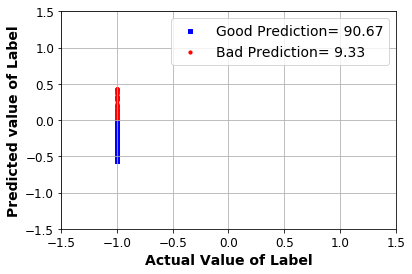

In [46]:
fig, ax = plt.subplots()
        
ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
ax.legend(loc = 'upper right', prop={'size': 14})
ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
    
ax.set_xlabel('Actual Value of Label')
ax.set_ylabel('Predicted value of Label')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid(True)
        
plt.show()